# Prepare the CIFAR dataset

## read_cifar_batch

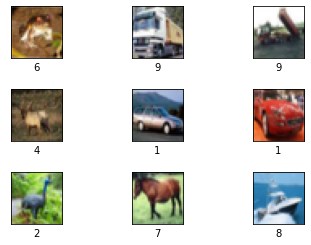

In [1]:
import numpy as np
import pickle

def read_cifar_batch(path):
    with open(path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')

    data=np.array(dict[b'data'],dtype=np.float32)/255
    labels=np.array(dict[b'labels'],dtype=np.int64)

    return data, labels

path = r'data/cifar-10-batches-py/data_batch_1'
data, labels = read_cifar_batch(path)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[i])

plt.show()

## read_cifar

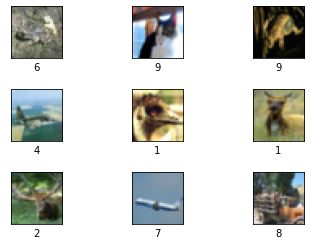

(60000, 3072) (60000,)


In [2]:
import glob 

def read_cifar(path_to_batches_files):
    files = glob.glob(f'{path_to_batches_files}/*_batch*')
    data, labels = read_cifar_batch(files[0])
    for i in range(1,len(files)):
        data_temp,labels_temp = read_cifar_batch(files[i])
        data = np.concatenate((data,data_temp),axis=0)
        labels = np.concatenate((labels,labels_temp),axis=0)
    return data,labels

# Affiche 9 images alléatoires pour vérifier le bon fonctionnement de la fonction read_cifar
data,labels = read_cifar("data/cifar-10-batches-py")
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    k = np.random.randint(0,len(data))
    ax.imshow(data[k].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[i])
    
plt.show()
print(data.shape,labels.shape)

## split_dataset 

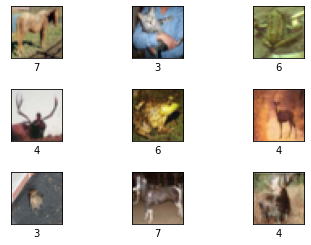

In [3]:
def split_data(data, labels, split=0.9):
    # shuffle
    index = np.arange(len(data))
    np.random.shuffle(index)
    data = data[index]
    labels = labels[index]
    
    # split
    split = int(len(data)*split)
    data_train = data[:split]
    labels_train = labels[:split]
    data_test = data[split:]
    labels_test = labels[split:]
    
    return data_train, labels_train, data_test, labels_test

# Affiche les 9 dernières images du jeu de données d'entrainement pour vérifier le bon fonctionnement de la fonction split_data
data_train, labels_train, data_test, labels_test = split_data(data,labels)
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(data_train[-i].reshape(3, 32, 32).transpose([1, 2, 0]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels_train[-i])
    
plt.show()

# k-nearest neighbors

## distance_matrix

In [4]:
def distance_matrix(X, Y):
    """function to get the distance matrix between two sets"""
    x2 = np.sum(X**2, axis=1, keepdims=True)
    y2 = np.sum(Y**2, axis=1, keepdims=True)
    
    return np.sqrt(-2*X.dot(Y.T) + x2  + y2.T)

# Test distance_matrix function
a = np.array([[1,4], 
              [-1,-2]])
b = np.array([[3,2], 
              [3,4]])

print(distance_matrix(a,b))

[[2.82842712 2.        ]
 [5.65685425 7.21110255]]


## knn_predict

In [5]:
def knn_predict(dists, labels_train, k):
    # Trie les distances
    index = np.argsort(dists)

    # Sélectionne les k plus proches
    k_nearest = index[:,:k]

    # Trie les labels correspondant aux k plus proches
    k_nearest_labels = labels_train[k_nearest]
    
    # Cherche le label le plus fréquent parmis les k plus proches
    labels = np.zeros(len(dists), dtype=np.int64)
    for i in range(len(dists)):
        labels[i] = np.argmax(np.bincount(k_nearest_labels[i]))
    
    return labels

## evaluate_knn

In [6]:
def evaluate_knn(data_train, labels_train, data_test, labels_test, k):
    # matrice des distances
    dists = distance_matrix(data_test, data_train)
    
    # Prédit les labels
    knn_predict_labels = knn_predict(dists, labels_train, k)

    # Calcul de précision
    accuracy = np.mean(knn_predict_labels==labels_test)

    return accuracy

accuracy for 1: 0.35683333333333334
accuracy for 2: 0.31433333333333335
accuracy for 3: 0.3406666666666667
accuracy for 4: 0.345
accuracy for 5: 0.3475
accuracy for 6: 0.3478333333333333
accuracy for 7: 0.349
accuracy for 8: 0.3443333333333333
accuracy for 9: 0.3426666666666667
accuracy for 10: 0.3416666666666667
accuracy for 11: 0.3395
accuracy for 12: 0.3431666666666667
accuracy for 13: 0.3423333333333333
accuracy for 14: 0.3396666666666667
accuracy for 15: 0.3405
accuracy for 16: 0.3406666666666667
accuracy for 17: 0.3396666666666667
accuracy for 18: 0.3365
accuracy for 19: 0.33666666666666667
accuracy for 20: 0.3348333333333333


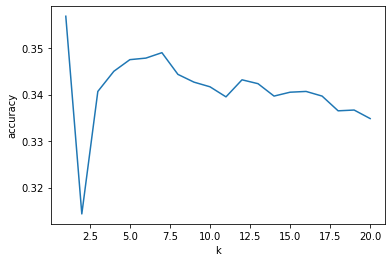

In [7]:
accuracy_list = []

for k in range(1,21):
    accuracy = evaluate_knn(data_train, labels_train, data_test, labels_test, k)
    accuracy_list.append(accuracy)
    print(f"accuracy for {k}: {accuracy}")

plt.plot(np.arange(1,21), accuracy_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

# Artificial Neural Network

## Code donné

In [8]:
import numpy as np

N = 30  # number of input data
d_in = 3  # input dimension
d_h = 3  # number of neurons in the hidden layer
d_out = 2  # output dimension (number of neurons of the output layer)

# Random initialization of the network weights and biaises
w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
b1 = np.zeros((1, d_h))  # first layer biaises
w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
b2 = np.zeros((1, d_out))  # second layer biaises

data = np.random.rand(N, d_in)  # create a random data
targets = np.random.rand(N, d_out)  # create a random targets

# Forward pass
a0 = data # the data are the input of the first layer
z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
z2 = np.matmul(a1, w2) + b2  # input of the output layer
a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
predictions = a2  # the predicted values are the outputs of the output layer

# Compute loss (MSE)
loss = np.mean(np.square(predictions - targets))
print(loss)

0.11671683617671368


## learn_once_mse

In [9]:
def learn_once_mse(w1, b1, w2, b2, data, targets, learning_rate):
    """ Function returning the updated weights and biased after one learning step and the loss """
    # Forward pass
    a0 = data  # the data are the input of the first layer 
    z1 = np.matmul(a0,w1)+b1  # input of the hidden layer
    a1 = 1/(1+np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1,w2)+b2  # input of the output layer
    a2 = 1/(1+np.exp(-z2))  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer
    
    #Compute loss (MSE)
    loss = np.mean(np.square(predictions-targets))
    #Backward pass
    #Compute gradients according to the formula calculated
    grad_a2 = 2*(predictions-targets)
    grad_z2 = grad_a2*a2*(1-a2) 
    grad_w2 = np.matmul(a1.T,grad_z2) 
    grad_b2 = np.sum(grad_z2,axis=0) 
    grad_a1 = np.matmul(grad_z2,w2.T)
    grad_z1 = grad_a1*a1*(1-a1) 
    grad_w1 = np.matmul(a0.T,grad_z1) 
    grad_b1 = np.sum(grad_z1,axis=0) 

    #Update weights and biaises
    w1 = w1-learning_rate*grad_w1
    w2 = w2-learning_rate*grad_w2
    b1 = b1-learning_rate*grad_b1
    b2 = b2-learning_rate*grad_b2

    return w1, b1, w2, b2, loss

### one_hot

In [10]:
def one_hot(labels):
    if type(labels)==np.int64:
        labels=np.array([labels])
    res=np.zeros((len(labels),9+1))
    res[np.arange(len(labels)),labels]=1
    return res

### learn_once_cross_entropy

In [11]:
import scipy.special as sp

def learn_once_cross_entropy(w1, b1, w2, b2, data, targets, learning_rate, batch_size):
    a0 = data  # the data are the input of the first layer 
    z1 = np.matmul(a0,w1)+b1  # input of the hidden layer
    a1 = 1/(1+np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1,w2)+b2  # input of the output layer
    a2 = sp.softmax(z2,axis=1)  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer

    # Compute loss (MSE)
    predi = a2.argmax(axis=1)
    c = 0
    for i in range (len(predi)):
        if predi[i] == targets[i]:
            c+=1
    targets = one_hot(targets)
    
    loss=-np.sum(targets*np.log(predictions+1e-8))/batch_size
    grad_z2 = (predictions-targets)/batch_size
    grad_w2 = np.matmul(a1.T,grad_z2) 
    grad_b2 = np.sum(grad_z2,axis=0)
    grad_a1 = np.matmul(grad_z2,w2.T) 
    grad_z1 = grad_a1*a1*(1-a1)
    a0 = a0.reshape(-1,batch_size)  #reshape data because a0 was (batch_size,) and we wanted (batch_size,1)
    grad_w1 = np.matmul(a0,grad_z1)
    grad_b1 = np.sum(grad_z1,axis=0)

    # Update weights and biaises
    w1 = w1-learning_rate*grad_w1
    w2 = w2-learning_rate*grad_w2
    b1 = b1-learning_rate*grad_b1
    b2 = b2-learning_rate*grad_b2

    # accuracy is returned instead of loss
    return w1, b1, w2, b2, c/len(predi)

### train_mlp

In [12]:
from tqdm import tqdm

def train_mlp(w1, b1, w2, b2, data_train, labels_train, learning_rate=0.01, nb_epochs=100, batch_size=1):
    train_accuracies=[]
    for i in range(nb_epochs):
        accuracies=[]
        for j in tqdm(range(int(len(data_train)/batch_size))):
            w1, b1, w2, b2, accuracy = learn_once_cross_entropy(w1,b1,w2,b2,data_train[j*batch_size:(j+1)*batch_size],labels_train[j*batch_size:(j+1)*batch_size],learning_rate,batch_size)
            accuracies.append(accuracy)

        if len(data_train) % batch_size != 0:
            w1, b1, w2, b2, accuracy = learn_once_cross_entropy(w1,b1,w2,b2,data_train[j*batch_size:],labels_train[j*batch_size:],learning_rate,len(data_train)%batch_size)
            accuracies.append(accuracy)

        print(f"epoch {i} : accuracy {sum(accuracies)/len(accuracies)}")

        train_accuracies.append(sum(accuracies)/len(accuracies))

    return w1, b1, w2, b2, train_accuracies

### test_mlp

In [13]:
def test_mlp(w1, b1, w2, b2, data_test, labels_test):
    a0 = data_test  # the data are the input of the first layer 
    z1 = np.matmul(a0,w1)+b1  # input of the hidden layer
    a1 = 1/(1+np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1,w2)+b2  # input of the output layer
    a2 = sp.softmax(z2)  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer
    
    # Compute loss (MSE)
    c = 0
    index_predic = a2.argmax(axis=1)
    for i in range(len(index_predic)):
        if index_predic[i] == labels_test[i]:
            c+=1
    return c/len(index_predic)

### run_mlp_training

In [14]:
def run_mlp_training(data_train, labels_train, data_test, labels_test, dh, learning_rate=0.1, nb_epochs=100, batch_size=200):
    # Initialization of the network weights and biaises
    w1 = 2*np.random.rand(3072,dh)-1  # first layer weights
    b1 = np.zeros((1,dh))  # first layer biaises
    w2 = 2*np.random.rand(dh,10)-1  # second layer weights
    b2 = np.zeros((1,10))  # second layer biaises

    # Training
    w1, b1, w2, b2, train_accuracies = train_mlp(w1, b1, w2, b2, data_train, labels_train, learning_rate, nb_epochs, batch_size)

    # Test
    test_accuracy = test_mlp(w1,b1,w2,b2,data_test,labels_test)

    print(test_accuracy)

    return train_accuracies, test_accuracy

  0%|          | 0/540 [00:00<?, ?it/s]

100%|██████████| 540/540 [00:02<00:00, 250.30it/s]


epoch 0 : loss 0.15005555555555541


100%|██████████| 540/540 [00:02<00:00, 253.23it/s]


epoch 1 : loss 0.18016666666666664


100%|██████████| 540/540 [00:02<00:00, 241.53it/s]


epoch 2 : loss 0.19607407407407418


100%|██████████| 540/540 [00:02<00:00, 252.24it/s]


epoch 3 : loss 0.2022592592592593


100%|██████████| 540/540 [00:02<00:00, 239.97it/s]


epoch 4 : loss 0.20403703703703716


100%|██████████| 540/540 [00:02<00:00, 250.46it/s]


epoch 5 : loss 0.20588888888888882


100%|██████████| 540/540 [00:02<00:00, 245.79it/s]


epoch 6 : loss 0.21009259259259275


100%|██████████| 540/540 [00:02<00:00, 232.29it/s]


epoch 7 : loss 0.22083333333333335


100%|██████████| 540/540 [00:02<00:00, 236.04it/s]


epoch 8 : loss 0.22761111111111107


100%|██████████| 540/540 [00:02<00:00, 245.97it/s]


epoch 9 : loss 0.23187037037037034


100%|██████████| 540/540 [00:02<00:00, 248.49it/s]


epoch 10 : loss 0.2330925925925928


100%|██████████| 540/540 [00:02<00:00, 247.60it/s]


epoch 11 : loss 0.2342777777777777


100%|██████████| 540/540 [00:02<00:00, 245.82it/s]


epoch 12 : loss 0.23562962962962936


100%|██████████| 540/540 [00:02<00:00, 224.94it/s]


epoch 13 : loss 0.23575925925925922


100%|██████████| 540/540 [00:02<00:00, 238.96it/s]


epoch 14 : loss 0.2375185185185184


100%|██████████| 540/540 [00:02<00:00, 237.98it/s]


epoch 15 : loss 0.24079629629629629


100%|██████████| 540/540 [00:02<00:00, 240.82it/s]


epoch 16 : loss 0.24279629629629637


100%|██████████| 540/540 [00:02<00:00, 243.57it/s]


epoch 17 : loss 0.24353703703703702


100%|██████████| 540/540 [00:02<00:00, 247.38it/s]


epoch 18 : loss 0.24411111111111125


100%|██████████| 540/540 [00:02<00:00, 244.60it/s]


epoch 19 : loss 0.24385185185185188


100%|██████████| 540/540 [00:02<00:00, 235.16it/s]


epoch 20 : loss 0.2445370370370371


100%|██████████| 540/540 [00:02<00:00, 241.96it/s]


epoch 21 : loss 0.24492592592592596


100%|██████████| 540/540 [00:02<00:00, 243.41it/s]


epoch 22 : loss 0.24612962962962956


100%|██████████| 540/540 [00:02<00:00, 240.70it/s]


epoch 23 : loss 0.24698148148148139


100%|██████████| 540/540 [00:02<00:00, 239.75it/s]


epoch 24 : loss 0.24607407407407392


100%|██████████| 540/540 [00:02<00:00, 240.25it/s]


epoch 25 : loss 0.24855555555555586


100%|██████████| 540/540 [00:02<00:00, 233.98it/s]


epoch 26 : loss 0.24907407407407398


100%|██████████| 540/540 [00:02<00:00, 235.74it/s]


epoch 27 : loss 0.25048148148148147


100%|██████████| 540/540 [00:02<00:00, 239.72it/s]


epoch 28 : loss 0.24988888888888888


100%|██████████| 540/540 [00:02<00:00, 239.63it/s]


epoch 29 : loss 0.2508333333333334


100%|██████████| 540/540 [00:02<00:00, 219.63it/s]


epoch 30 : loss 0.2508888888888889


100%|██████████| 540/540 [00:02<00:00, 229.56it/s]


epoch 31 : loss 0.2510555555555557


100%|██████████| 540/540 [00:02<00:00, 223.70it/s]


epoch 32 : loss 0.2512962962962964


100%|██████████| 540/540 [00:02<00:00, 239.22it/s]


epoch 33 : loss 0.25098148148148147


100%|██████████| 540/540 [00:02<00:00, 228.40it/s]


epoch 34 : loss 0.2512962962962963


100%|██████████| 540/540 [00:02<00:00, 214.91it/s]


epoch 35 : loss 0.2518333333333333


100%|██████████| 540/540 [00:02<00:00, 254.66it/s]


epoch 36 : loss 0.2521666666666667


100%|██████████| 540/540 [00:02<00:00, 238.71it/s]


epoch 37 : loss 0.2531296296296293


100%|██████████| 540/540 [00:01<00:00, 292.83it/s]


epoch 38 : loss 0.2537592592592596


100%|██████████| 540/540 [00:01<00:00, 274.62it/s]


epoch 39 : loss 0.253962962962963


100%|██████████| 540/540 [00:01<00:00, 300.63it/s]


epoch 40 : loss 0.25396296296296267


100%|██████████| 540/540 [00:02<00:00, 246.90it/s]


epoch 41 : loss 0.25377777777777744


100%|██████████| 540/540 [00:02<00:00, 222.76it/s]


epoch 42 : loss 0.25372222222222196


100%|██████████| 540/540 [00:02<00:00, 224.38it/s]


epoch 43 : loss 0.2534629629629629


100%|██████████| 540/540 [00:02<00:00, 229.43it/s]


epoch 44 : loss 0.25268518518518507


100%|██████████| 540/540 [00:02<00:00, 240.06it/s]


epoch 45 : loss 0.25307407407407395


100%|██████████| 540/540 [00:02<00:00, 254.13it/s]


epoch 46 : loss 0.2528703703703703


100%|██████████| 540/540 [00:02<00:00, 230.55it/s]


epoch 47 : loss 0.2533518518518519


100%|██████████| 540/540 [00:02<00:00, 241.98it/s]


epoch 48 : loss 0.25375925925925913


100%|██████████| 540/540 [00:02<00:00, 243.22it/s]


epoch 49 : loss 0.2545740740740741


100%|██████████| 540/540 [00:02<00:00, 237.40it/s]


epoch 50 : loss 0.2541481481481481


100%|██████████| 540/540 [00:02<00:00, 243.87it/s]


epoch 51 : loss 0.25422222222222207


100%|██████████| 540/540 [00:02<00:00, 231.09it/s]


epoch 52 : loss 0.2547222222222223


100%|██████████| 540/540 [00:02<00:00, 230.21it/s]


epoch 53 : loss 0.25768518518518513


100%|██████████| 540/540 [00:02<00:00, 230.22it/s]


epoch 54 : loss 0.25805555555555554


100%|██████████| 540/540 [00:02<00:00, 229.84it/s]


epoch 55 : loss 0.2578703703703704


100%|██████████| 540/540 [00:02<00:00, 219.16it/s]


epoch 56 : loss 0.2579074074074076


100%|██████████| 540/540 [00:02<00:00, 254.64it/s]


epoch 57 : loss 0.258277777777778


100%|██████████| 540/540 [00:02<00:00, 206.95it/s]


epoch 58 : loss 0.2579444444444445


100%|██████████| 540/540 [00:02<00:00, 239.24it/s]


epoch 59 : loss 0.2574444444444443


100%|██████████| 540/540 [00:02<00:00, 237.35it/s]


epoch 60 : loss 0.2573333333333333


100%|██████████| 540/540 [00:02<00:00, 221.74it/s]


epoch 61 : loss 0.25831481481481455


100%|██████████| 540/540 [00:02<00:00, 233.24it/s]


epoch 62 : loss 0.2591481481481481


100%|██████████| 540/540 [00:02<00:00, 235.73it/s]


epoch 63 : loss 0.25975925925925936


100%|██████████| 540/540 [00:02<00:00, 235.15it/s]


epoch 64 : loss 0.2587592592592597


100%|██████████| 540/540 [00:02<00:00, 237.69it/s]


epoch 65 : loss 0.2587962962962962


100%|██████████| 540/540 [00:02<00:00, 230.86it/s]


epoch 66 : loss 0.25924074074074055


100%|██████████| 540/540 [00:02<00:00, 215.31it/s]


epoch 67 : loss 0.25803703703703695


100%|██████████| 540/540 [00:02<00:00, 217.95it/s]


epoch 68 : loss 0.2573703703703702


100%|██████████| 540/540 [00:02<00:00, 228.84it/s]


epoch 69 : loss 0.25750000000000006


100%|██████████| 540/540 [00:02<00:00, 218.35it/s]


epoch 70 : loss 0.2572777777777776


100%|██████████| 540/540 [00:02<00:00, 239.68it/s]


epoch 71 : loss 0.257148148148148


100%|██████████| 540/540 [00:02<00:00, 231.19it/s]


epoch 72 : loss 0.2566851851851853


100%|██████████| 540/540 [00:02<00:00, 225.63it/s]


epoch 73 : loss 0.2566481481481482


100%|██████████| 540/540 [00:02<00:00, 226.23it/s]


epoch 74 : loss 0.25992592592592584


100%|██████████| 540/540 [00:02<00:00, 225.89it/s]


epoch 75 : loss 0.26166666666666694


100%|██████████| 540/540 [00:02<00:00, 199.30it/s]


epoch 76 : loss 0.2615370370370369


100%|██████████| 540/540 [00:02<00:00, 225.21it/s]


epoch 77 : loss 0.2616481481481484


100%|██████████| 540/540 [00:02<00:00, 233.76it/s]


epoch 78 : loss 0.2619629629629632


100%|██████████| 540/540 [00:02<00:00, 252.01it/s]


epoch 79 : loss 0.26446296296296284


100%|██████████| 540/540 [00:02<00:00, 230.78it/s]


epoch 80 : loss 0.2664444444444444


100%|██████████| 540/540 [00:02<00:00, 232.22it/s]


epoch 81 : loss 0.2675740740740741


100%|██████████| 540/540 [00:02<00:00, 227.77it/s]


epoch 82 : loss 0.2685925925925929


100%|██████████| 540/540 [00:02<00:00, 231.71it/s]


epoch 83 : loss 0.26988888888888884


100%|██████████| 540/540 [00:02<00:00, 238.88it/s]


epoch 84 : loss 0.2702222222222224


100%|██████████| 540/540 [00:02<00:00, 238.20it/s]


epoch 85 : loss 0.27150000000000024


100%|██████████| 540/540 [00:02<00:00, 237.00it/s]


epoch 86 : loss 0.2719814814814814


100%|██████████| 540/540 [00:02<00:00, 234.99it/s]


epoch 87 : loss 0.27187037037037054


100%|██████████| 540/540 [00:02<00:00, 221.09it/s]


epoch 88 : loss 0.27220370370370395


100%|██████████| 540/540 [00:02<00:00, 230.70it/s]


epoch 89 : loss 0.2720000000000003


100%|██████████| 540/540 [00:02<00:00, 241.90it/s]


epoch 90 : loss 0.2719259259259262


100%|██████████| 540/540 [00:02<00:00, 242.42it/s]


epoch 91 : loss 0.2720555555555557


100%|██████████| 540/540 [00:02<00:00, 224.82it/s]


epoch 92 : loss 0.2728518518518519


100%|██████████| 540/540 [00:02<00:00, 236.37it/s]


epoch 93 : loss 0.272925925925926


100%|██████████| 540/540 [00:02<00:00, 235.84it/s]


epoch 94 : loss 0.27274074074074106


100%|██████████| 540/540 [00:02<00:00, 240.79it/s]


epoch 95 : loss 0.2726666666666671


100%|██████████| 540/540 [00:02<00:00, 233.30it/s]


epoch 96 : loss 0.2726851851851854


100%|██████████| 540/540 [00:02<00:00, 237.33it/s]


epoch 97 : loss 0.272740740740741


100%|██████████| 540/540 [00:02<00:00, 231.87it/s]


epoch 98 : loss 0.2729444444444449


100%|██████████| 540/540 [00:02<00:00, 237.97it/s]


epoch 99 : loss 0.2731851851851853
0.284


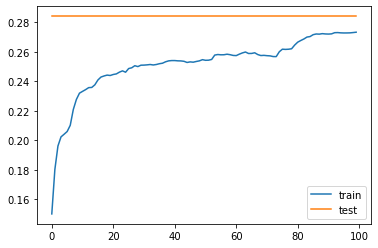

In [15]:
train_accuracies, test_accuracy = run_mlp_training(data_train,labels_train,data_test,labels_test,64,0.1,100,100)
plt.plot(train_accuracies, label="train")

test_accuracies = [test_accuracy for i in range(len(train_accuracies))]
plt.plot(test_accuracies, label="test")

plt.legend()
plt.show()

# ERROR ! : "loss" is printed instead of "accuracy", not rerun because of slow pc